In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path

# Total number of threatened species by country

The IUCN Red List provides a dataset, that contains the total number of threatened species for each country that is listed. Threatened species means that the status is either critically endangered, endangered or vulnerable. The species are summed up by their major taxonomic group. For our analysis we just keep the groups that are animals and do not only live in the water (meaning mammals, birds, reptiles, amphibians). Molluscs and other invertebrates are also exclude, because they contain various animals that live in water.

In [2]:
#load IUCN data
DATA_PATH = Path('./data/IUCN')
table_5 = pd.read_csv(DATA_PATH / 'Table 5  Threatened species in each major group by country - show all.csv')

In [3]:
#only keep relevant groups
threatened_total_groups = table_5[['Name','Mammals','Birds','Reptiles*','Amphibians','Total']]

In [4]:
#rename columns and set country as index
threatened_total_groups = threatened_total_groups.rename(columns={'Name': 'Country', 'Reptiles*': 'Reptiles', 'Total': 'Threatened_Total'})
threatened_total_groups = threatened_total_groups.set_index('Country')

In [5]:
#calculate new total and create new data frame without group specifications
threatened_total_groups['Total'] = threatened_total_groups['Mammals']+threatened_total_groups['Birds']+threatened_total_groups['Reptiles']+threatened_total_groups['Amphibians']
threatened_total = threatened_total_groups[['Total']]
threatened_total.shape

(250, 1)

In [6]:
#check for NAs
threatened_total_groups.isna().sum()

Mammals             0
Birds               0
Reptiles            0
Amphibians          0
Threatened_Total    0
Total               0
dtype: int64

In [7]:
#descriptive statistics
threatened_total_groups.describe()

,Mammals,Birds,Reptiles,Amphibians,Total
count,250.000000,250.000000,250.00000,250.000000,250.000000
mean,15.032000,19.760000,10.39600,10.792000,55.980000
std,22.609106,24.201928,17.10114,32.858782,83.424181
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.000000,7.000000,2.00000,0.000000,13.000000
50%,8.000000,13.000000,5.00000,0.000000,29.500000
75%,17.000000,21.000000,9.00000,3.750000,53.000000
max,212.000000,175.000000,139.00000,285.000000,512.000000


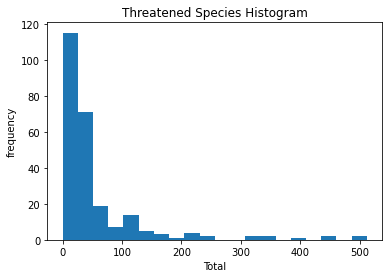

In [8]:
plt.hist(threatened_total_groups['Total'], bins = 20)
plt.title('Threatened Species Histogram')
plt.xlabel('Total')
plt.ylabel('frequency')
plt.show()

In [9]:
threatened_total_groups.to_csv(DATA_PATH / 'THREATENED_TOTAL_GROUPS.csv')
threatened_total.to_csv(DATA_PATH / 'THREATENED_TOTAL.csv')

## Add species per country to get relative numbers
As the absolute number of species in a country doesn't give us any information of how big that number is compared to all described species of the given country, we add this information from the following data. This enables us to then predict the relative number of threatened species, which is more meaningful.

In [10]:
species_per_country = pd.read_csv(DATA_PATH / 'species_per_country.csv')
species_per_country.head()

,country,amphibians,birds,insects,mammals,reptiles,Total
0,Argentina,165.0,1001.0,242.0,379.0,376.0,2163.0
1,Armenia,8.0,297.0,73.0,92.0,43.0,513.0
2,Australia,223.0,726.0,563.0,354.0,992.0,2858.0
3,Austria,19.0,305.0,323.0,88.0,13.0,748.0
4,Azerbaijan,11.0,348.0,73.0,104.0,50.0,586.0


We only keep the information about mammals, birds, reptiles and amphibians and calculate a new total, to then create the new data frame with relative numbers

In [11]:
species_reduced = species_per_country.copy()
species_reduced = species_reduced[['country','mammals','birds','reptiles','amphibians']]
species_reduced['Total'] = species_reduced['mammals']+species_reduced['birds']+species_reduced['reptiles']+species_reduced['amphibians']
species_total = species_reduced.copy()
species_total = species_total[['country','Total']]
species_total = species_total.rename(columns={'country': 'Country'})
species_total.shape

(65, 2)

In [12]:
#merge threatened_total and species_total by country
threatened_tot = threatened_total.reset_index()
species_merged = species_total.merge(threatened_total, on='Country', how='inner')
species_merged['Relative'] = species_merged['Total_y']/species_merged['Total_x']
species_rel= species_merged[['Country','Relative']]
species_rel.describe()

,Relative
count,61.000000
mean,0.083078
std,0.061233
min,0.011628
25%,0.044818
50%,0.066079
75%,0.097015
max,0.367164


In [13]:
species_rel.to_csv(DATA_PATH / 'THREATENED_RELATIVE.csv')